# GEOG 5160 6160 Lab 03

This document preps the CSV file for lab 3

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
## Set random seed for reproducibility
np.random.seed(1234)

In [2]:
presence = pd.read_csv("./datafiles/Pinus_edulis.csv")
presence['pa'] = 1
presence.describe()

,gbifid,latitude,longitude,pa
count,2.990000e+02,299.000000,299.000000,299.0
mean,1.572063e+09,36.275753,-108.587322,1.0
std,3.916628e+08,2.061340,3.096906,0.0
min,5.662771e+07,31.707778,-115.585586,1.0
25%,1.453172e+09,35.161349,-111.825712,1.0
50%,1.677271e+09,36.066280,-108.347447,1.0
75%,1.847535e+09,37.671059,-105.833923,1.0
max,1.899817e+09,40.894330,-102.947806,1.0


In [3]:
absence = pd.read_csv("./datafiles/absence.csv")
absence['pa'] = 0


In [4]:
pe = pd.concat([presence, absence], axis=0)
pe.head()


,gbifid,species,latitude,longitude,pa
0,1.899817e+09,Pinus edulis,38.866005,-104.896667,1
1,1.899816e+09,Pinus edulis,38.875486,-104.883196,1
2,1.899814e+09,Pinus edulis,38.722775,-104.839340,1
3,1.899814e+09,Pinus edulis,38.864713,-104.897199,1
4,1.899813e+09,Pinus edulis,38.908459,-104.855046,1


In [5]:
import xarray as xr
curr_env = xr.open_dataset('./datafiles/current_env.nc')
curr_env.info
#curr_env['variable'].sel(lon=-107, lat=40)

<bound method Dataset.info of <xarray.Dataset> Size: 26MB
Dimensions:    (longitude: 720, latitude: 480, z: 19)
Coordinates:
  * longitude  (longitude) float64 6kB -130.0 -129.9 -129.9 ... -100.1 -100.0
  * latitude   (latitude) float64 4kB 49.98 49.94 49.9 ... 30.1 30.06 30.02
  * z          (z) int32 76B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    crs        int32 4B ...
    BIO        (z, latitude, longitude) float32 26MB ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-03-10 13:49:36>

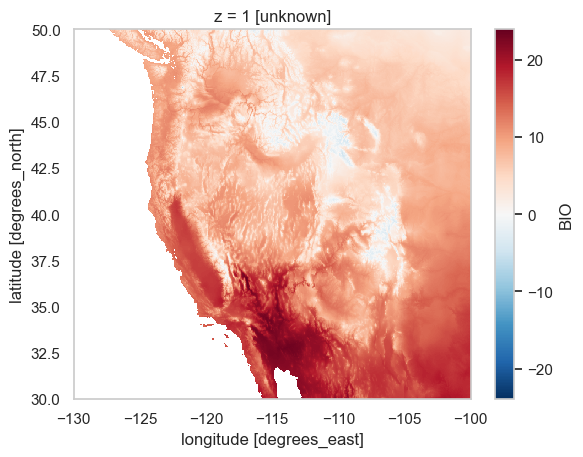

In [6]:
curr_env.BIO[0].plot()

In [7]:
lons = xr.DataArray(pe['longitude'], dims='x')
lats = xr.DataArray(pe['latitude'], dims='x')

ind = xr.DataArray([pe['longitude'], pe['latitude']], dims = ['x','x'])

/opt/homebrew/Caskroom/miniforge/base/envs/geog5160/lib/python3.12/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'x'} appear more than once in dims=('x', 'x'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  warnings.warn(


In [8]:
env_data = curr_env.sel(latitude = lats, longitude = lons, method = 'nearest')
env_data
#data.values
# env_data.__class__

# env_data = curr_env.sel(ind, method = 'nearest')
# env_data


<xarray.Dataset> Size: 60kB
Dimensions:    (x: 598, z: 19)
Coordinates:
    longitude  (x) float64 5kB -104.9 -104.9 -104.9 ... -106.5 -103.8 -115.7
    latitude   (x) float64 5kB 38.85 38.9 38.73 38.85 ... 34.19 32.69 37.73
  * z          (z) int32 76B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * x          (x) int64 5kB 0 1 2 3 4 5 6 7 ... 291 292 293 294 295 296 297 298
Data variables:
    crs        int32 4B ...
    BIO        (z, x) float32 45kB ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-03-10 13:49:36

In [9]:
env_data['BIO'].to_dataframe()

longitude   latitude   BIO
z  x                               
1  0   -104.895833  38.854167   8.0
   1   -104.895833  38.895833   6.4
   2   -104.854167  38.729167   5.8
   3   -104.895833  38.854167   8.0
   4   -104.854167  38.895833   8.2
...            ...        ...   ...
19 294 -102.520833  34.520833  37.0
   295 -109.895833  39.729167  45.0
   296 -106.520833  34.187500  47.0
   297 -103.770833  32.687500  33.0
   298 -115.687500  37.729167  60.0

[11362 rows x 3 columns]

In [10]:
env_data['BIO'].to_numpy()

array([[  8. ,   6.4,   5.8, ...,  11.8,  16. ,  11.8],
       [ 16.6,  16.7,  16.2, ...,  17.7,  17.3,  16.8],
       [  4.2,   4.2,   4.2, ...,   4.5,   4.5,   4.2],
       ...,
       [ 34. ,  38. ,  43. , ...,  41. ,  31. ,  41. ],
       [194. , 204. , 214. , ..., 142. , 155. ,  49. ],
       [ 34. ,  38. ,  43. , ...,  47. ,  33. ,  60. ]],
      shape=(19, 598), dtype=float32)

In [11]:
env_arr = env_data['BIO'].values
env_arr.shape

(19, 598)

In [12]:
var_names = ["bio"+str(i+1) for i in range(19)]
x = pd.DataFrame(env_data['BIO'].values.transpose(),
                columns = var_names)

In [13]:
x.head()

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,18.500000,-1.7,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
1,6.4,16.700001,4.2,778.099976,27.000000,-12.1,39.099998,16.700001,-3.2,16.700001,-3.2,452.0,76.0,10.0,59.0,204.0,38.0,204.0,38.0
2,5.8,16.200001,4.2,778.000000,26.100000,-12.4,38.500000,16.100000,-3.8,16.100000,-3.8,474.0,81.0,11.0,58.0,214.0,43.0,214.0,43.0
3,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,18.500000,-1.7,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
4,8.2,16.400000,4.1,792.900024,28.900000,-10.2,39.099998,18.799999,-1.5,18.799999,-1.5,426.0,72.0,9.0,60.0,194.0,34.0,194.0,34.0


In [14]:
pe.columns

Index(['gbifid', 'species', 'latitude', 'longitude', 'pa'], dtype='object')

In [15]:
pe.reset_index(inplace=True, drop=True)
x.reset_index(inplace=True, drop=True)

In [16]:
pe = pd.concat([pe, x], axis=1)
pe

,gbifid,species,latitude,longitude,pa,bio1,bio2,bio3,bio4,bio5,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,1.899817e+09,Pinus edulis,38.866005,-104.896667,1,8.0,16.600000,4.2,789.000000,28.700001,...,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
1,1.899816e+09,Pinus edulis,38.875486,-104.883196,1,6.4,16.700001,4.2,778.099976,27.000000,...,16.700001,-3.2,452.0,76.0,10.0,59.0,204.0,38.0,204.0,38.0
2,1.899814e+09,Pinus edulis,38.722775,-104.839340,1,5.8,16.200001,4.2,778.000000,26.100000,...,16.100000,-3.8,474.0,81.0,11.0,58.0,214.0,43.0,214.0,43.0
3,1.899814e+09,Pinus edulis,38.864713,-104.897199,1,8.0,16.600000,4.2,789.000000,28.700001,...,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
4,1.899813e+09,Pinus edulis,38.908459,-104.855046,1,8.2,16.400000,4.1,792.900024,28.900000,...,18.799999,-1.5,426.0,72.0,9.0,60.0,194.0,34.0,194.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,NaN,34.525225,-102.534971,0,13.4,16.700001,4.2,800.900024,32.500000,...,23.600000,3.0,444.0,74.0,11.0,61.0,203.0,37.0,203.0,37.0
594,NaN,NaN,39.715135,-109.901510,0,7.9,15.700000,3.4,985.799988,31.299999,...,20.400000,-5.2,242.0,26.0,14.0,20.0,78.0,45.0,66.0,45.0
595,NaN,NaN,34.174115,-106.530940,0,11.8,17.700001,4.5,762.299988,31.600000,...,21.700001,2.1,321.0,64.0,13.0,64.0,164.0,41.0,142.0,47.0
596,NaN,NaN,32.707550,-103.782630,0,16.0,17.299999,4.5,757.799988,34.500000,...,25.600000,6.1,358.0,64.0,9.0,66.0,174.0,31.0,155.0,33.0


In [17]:
pe.to_csv("./datafiles/pe_df.csv", index=False)